In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#setting the path of images
train_path = '/content/drive/MyDrive/Garbage classification/train'
valid_path = '/content/drive/MyDrive/Garbage classification/valid'
test_path = '/content/drive/MyDrive/Garbage classification/test'

In [ ]:
#generating images per batch
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['cardboard','glass','metal','paper','plastic','trash'],batch_size=15)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['cardboard','glass','metal','paper','plastic','trash'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['cardboard','glass','metal','paper','plastic','trash'],batch_size=5)

Found 4574 images belonging to 6 classes.
Found 152 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


In [ ]:
#plot images with repective labels in notebook
def plots(ims, figsize=(36,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


In [ ]:
imgs, labels = next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


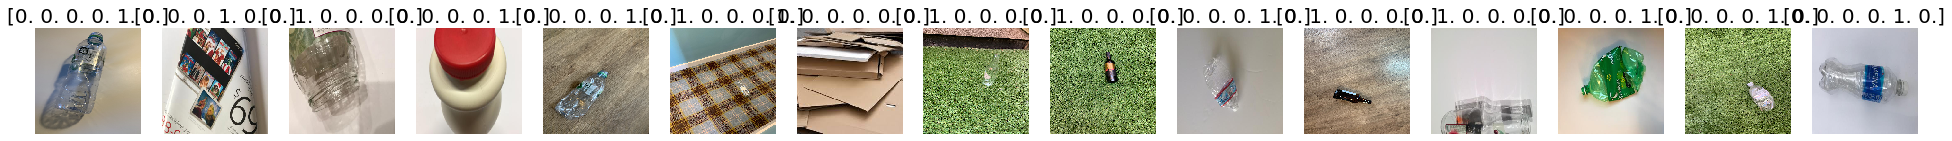

In [ ]:
plots(imgs,titles=labels)

# building and training

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(6, activation='softmax')
])

In [ ]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches, steps_per_epoch=305, validation_data=valid_batches, validation_steps=16, epochs=10, verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
305/305 - 121s - loss: 178.1658 - accuracy: 0.5026 - val_loss: 62.8893 - val_accuracy: 0.5132
Epoch 2/10
305/305 - 120s - loss: 19.9525 - accuracy: 0.7484 - val_loss: 46.8820 - val_accuracy: 0.4474
Epoch 3/10
305/305 - 120s - loss: 4.5427 - accuracy: 0.8787 - val_loss: 25.2148 - val_accuracy: 0.5789
Epoch 4/10
305/305 - 121s - loss: 1.5012 - accuracy: 0.9344 - val_loss: 22.4199 - val_accuracy: 0.6645
Epoch 5/10
305/305 - 120s - loss: 1.3809 - accuracy: 0.9429 - val_loss: 21.6100 - val_accuracy: 0.6513
Epoch 6/10
305/305 - 120s - loss: 1.2395 - accuracy: 0.9561 - val_loss: 28.5674 - val_accuracy: 0.6842
Epoch 7/10
305/305 - 119s - loss: 1.2868 - accuracy: 0.9488 - val_loss: 27.4886 - val_accuracy: 0.6118
Epoch 8/10
305/305 - 121s - loss: 0.4373 - accuracy: 0.9742 - val_loss: 26.4681 - val_accuracy: 0.6974
Epoch 9/10
305/305 - 119s - loss: 1.3869 - accuracy: 0.9443 - val_loss: 29.0909 - val_accuracy: 0

Prediction

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


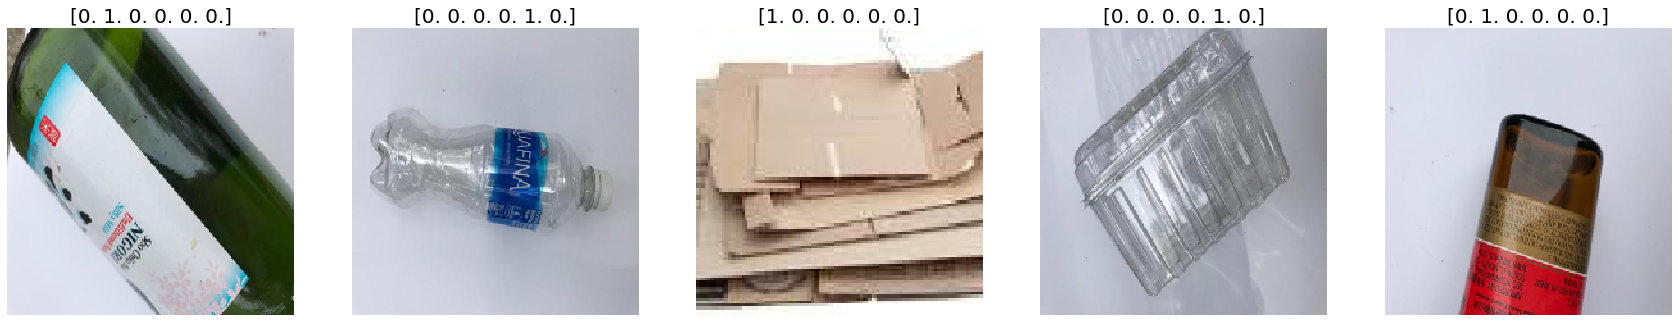

In [ ]:
testimg, testlabels = next(test_batches)
plots(testimg, titles=testlabels)

In [ ]:
prediction = model.predict_generator(test_batches, steps=8, verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


8/8 - 19s


In [ ]:
prediction

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        3.6426634e-34, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        8.7926473e-38, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        8.6473642e-20, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        5.2498766e-35, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        9.3776473e-19, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.4035481e-25, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00,

In [ ]:
vgg16 = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
for layer in vgg16.layers:
    model.add(layer)
    

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
model.layers.pop()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Training fine tuned vgg16 model

In [ ]:
model.compile(Adam(lr=0.0001),loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches, steps_per_epoch=305, validation_data=valid_batches, validation_steps=16,epochs=10,verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


In [ ]:
testimg, testlabels = next(test_batches)
plots(testimg, titles=testlabels)

In [ ]:
prediction = model.predict_generator(test_batches, steps=8, verbose=2)

In [ ]:
prediction

In [ ]:
def plot_confusion_matrix(cm, classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

In [ ]:

cm = confusion_matrix(test_labels, prediction.argmax(axis=1))

In [ ]:
cm_plot_labels = ['cardboard','glass','aluminium','paper','plastic']

In [ ]:
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')